In [1]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=path, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
cd /content/gdrive/My Drive/chung_proj/인구수 추이

/content/gdrive/My Drive/chung_proj/인구수 추이


# 2000년 - 2020년 군산의 총인구수, 남여 인구수 추이 데이터 불러오기

In [11]:
peo = pd.read_csv('군산인구수.csv', encoding='cp949')

행정구역별 열 삭제, 2000년부터 2009년까지의 행 삭제해주기

In [12]:
peo.drop(['행정구역(시군구)별'],axis = 1, inplace = True)
peo.drop([peo.index[0],peo.index[1],peo.index[2],peo.index[3],peo.index[4],peo.index[5],peo.index[6],peo.index[7],peo.index[8],peo.index[9]],inplace = True)
peo.reset_index(inplace = True)

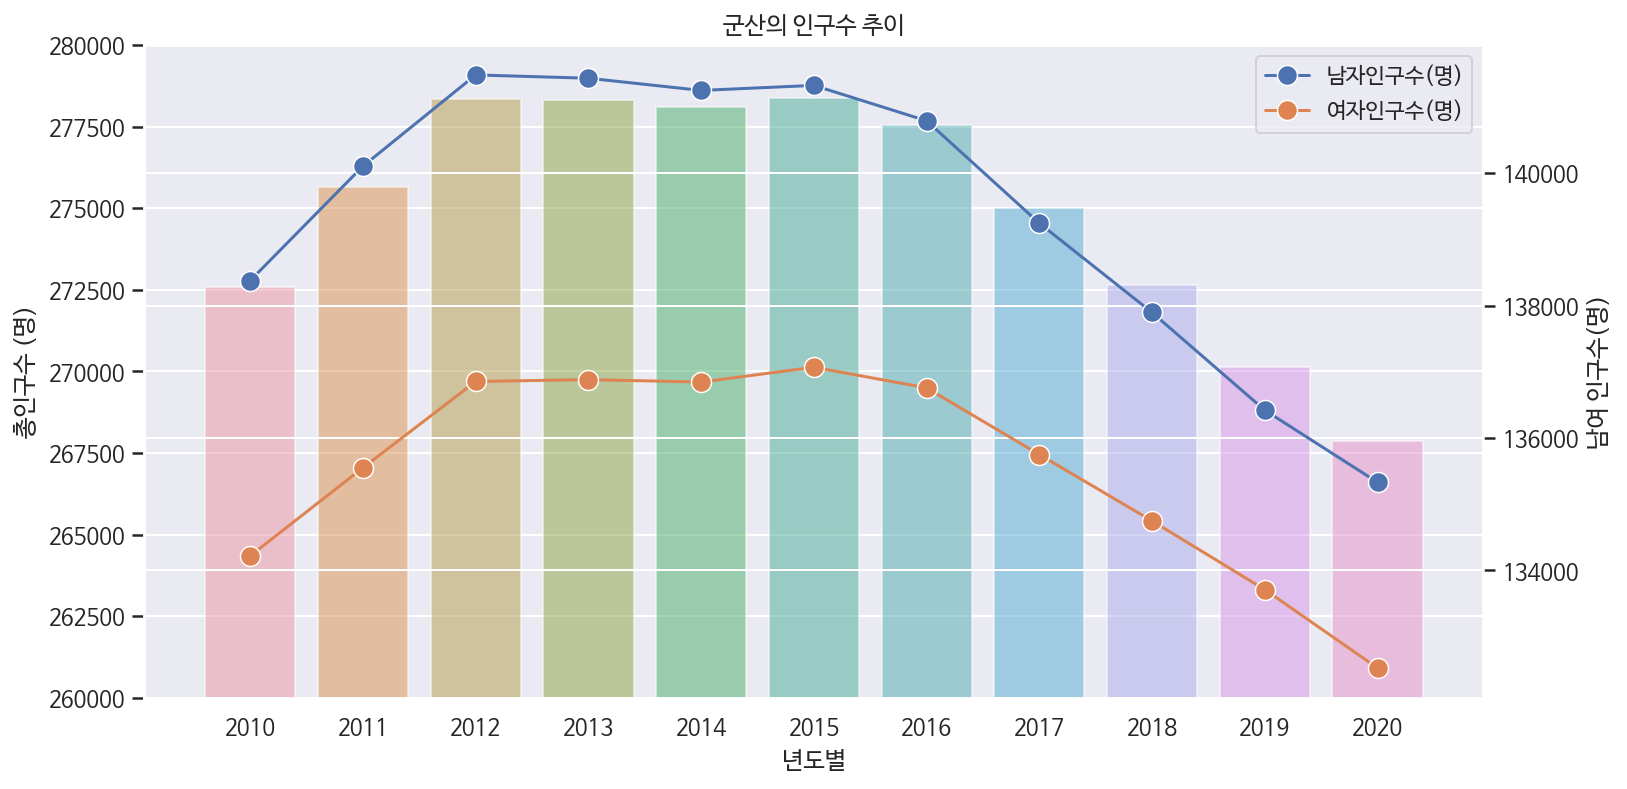

In [14]:
sns.set(rc = {'figure.figsize':(50,10)})
plt.rc('font', family='NanumBarunGothic') 

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = peo, x='시점', y='총인구수 (명)', alpha=0.5, ax=ax1)

plt.ylim([260000, 280000])     # Y축의 범위: [ymin, ymax]

ax2 = ax1.twinx()

line1 = sns.lineplot(data = peo['남자인구수 (명)'], marker='o',markersize=10, sort = False, ax=ax2)
line2 = sns.lineplot(data = peo['여자인구수 (명)'], marker='o',markersize=10, sort = False, ax=ax2)

labels = ['남자인구수(명)','여자인구수(명)']
ax2.legend( labels, loc='upper right')
ax1.set_xlabel('년도별')
ax2.set_ylabel('남여 인구수(명)')

plt.title('군산의 인구수 추이')
plt.show()